In [30]:
#1. Import the necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

customer_df = pd.read_csv ('we_fn_use_c_marketing_customer_value_analysis.csv')

In [32]:
#First look at its main features (head, shape, info).

customer_df.shape
customer_df.head
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [33]:
customer_df.head

<bound method NDFrame.head of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor      

In [34]:
for col in customer_df.columns:
    print(col)

Customer
State
Customer Lifetime Value
Response
Coverage
Education
Effective To Date
EmploymentStatus
Gender
Income
Location Code
Marital Status
Monthly Premium Auto
Months Since Last Claim
Months Since Policy Inception
Number of Open Complaints
Number of Policies
Policy Type
Policy
Renew Offer Type
Sales Channel
Total Claim Amount
Vehicle Class
Vehicle Size


In [37]:
#Change effective to date column to datetime format.

customer_df['Effective_to_date'] = pd.to_datetime(customer_df['Effective_to_date'], infer_datetime_format=True)


KeyError: 'Effective_to_date'

In [35]:
#Rename the columns so they follow the PE8 (snake case).

customer_df = customer_df.rename(columns = {'EmploymentStatus':'Employment Status'})

In [46]:
#Plot every continuous variable. Comment what you can see in the plots.
#Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
customer_df.dtypes


Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
Employment Status                 object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [47]:
def split_discrete_continuous(data):
    discrete   = data.select_dtypes(np.int64)
    continuous = data.select_dtypes(include=[np.datetime64, np.float64])
    categorical = data.select_dtypes(object)
    return discrete,continuous,categorical

In [48]:

discrete,continuous,categorical = split_discrete_continuous(customer_df)

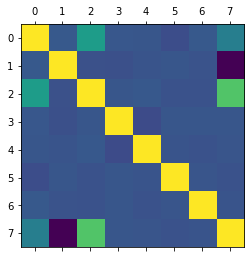

In [52]:
#Plot a correlation matrix, and comment on what you observe.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.matshow(customer_df.corr())
plt.show()

In [53]:
#Check all columns for NaN values. Decide what (if anything) you will need to do with them.

customer_df.isna().sum()


Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64